In [3]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
img = cv2.imread('/home/nirant/xray.jpg', 0)

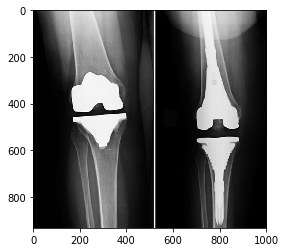

In [13]:
def show_img(img):
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img, cmap='gray')
    plt.show()
    
show_img(img)

In [14]:
img.shape

(933, 1000)

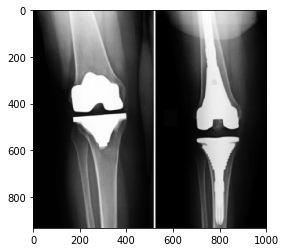

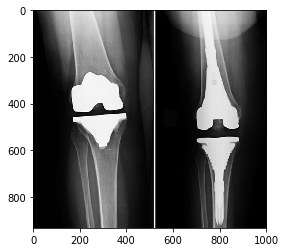

(None, None)

In [47]:
blurred = cv2.GaussianBlur(img, (11, 11), 0)
show_img(blurred), show_img(img)

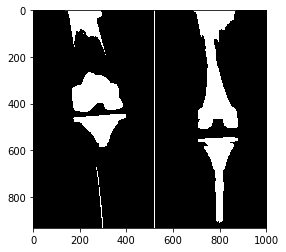

In [56]:
thresh = cv2.threshold(blurred, 190, 255, cv2.THRESH_BINARY)[1]
show_img(thresh)

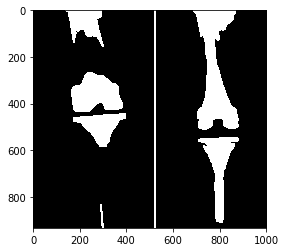

In [57]:
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=4)
show_img(thresh)

In [62]:
from skimage import measure
from imutils import contours

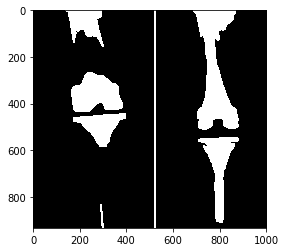

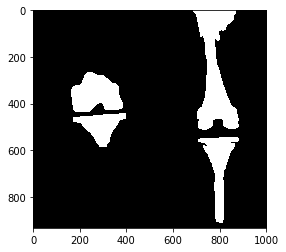

In [76]:
labels = measure.label(thresh, neighbors=8, background=0)
mask = np.zeros(thresh.shape, dtype="uint8")
 
# loop over the unique components
for label in np.unique(labels):
    # if this is the background label, ignore it
    if label == 0:
        continue
 
    # otherwise, construct the label mask and count the
    # number of pixels 
    labelMask = np.zeros(thresh.shape, dtype="uint8")
    labelMask[labels == label] = 255
    numPixels = cv2.countNonZero(labelMask)
#     print(numPixels)
 
    # if the number of pixels in the component is sufficiently
    # large, then add it to our mask of "large blobs"
    if numPixels > 15000:
        mask = cv2.add(mask, labelMask)
show_img(thresh)
show_img(mask)